In [727]:
import pandas as pd
import seaborn as sns
df = pd.read_csv('/content/cars_ds_final.csv')

# Data Cleaning

In [728]:
df.columns = df.columns.str.lower()
df.columns

Index(['unnamed: 0', 'make', 'model', 'variant', 'ex-showroom_price',
       'displacement', 'cylinders', 'valves_per_cylinder', 'drivetrain',
       'cylinder_configuration',
       ...
       'leather_wrapped_steering', 'automatic_headlamps', 'engine_type',
       'asr_/_traction_control', 'cruise_control', 'usb_ports',
       'heads-up_display', 'welcome_lights', 'battery', 'electric_range'],
      dtype='object', length=141)

In [729]:
df['ex-showroom_price'] = df['ex-showroom_price'].str.replace(',','')
df['ex-showroom_price'] = df['ex-showroom_price'].str.replace('Rs.','')
df['displacement'] = df['displacement'].str.replace('cc','')
df['city_mileage']= df['city_mileage'].str.replace(',','.')



<ipython-input-729-9bc38a82b2b6>:2: FutureWarning:

The default value of regex will change from True to False in a future version.



In [730]:

df.sample(5)

,unnamed: 0,make,model,variant,ex-showroom_price,displacement,cylinders,valves_per_cylinder,drivetrain,cylinder_configuration,...,leather_wrapped_steering,automatic_headlamps,engine_type,asr_/_traction_control,cruise_control,usb_ports,heads-up_display,welcome_lights,battery,electric_range
642,642,Mahindra,Tuv300 Plus,P4,992748,2179,3.0,4.0,RWD (Rear Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
597,597,Renault,Lodgy,85 Ps Rxe 8 Seater,964199,1461,4.0,4.0,FWD (Front Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
393,393,Hyundai,Grand I10 Prime,Era T Cng Vtvt,528804,1197,4.0,4.0,FWD (Front Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
927,927,Nissan,Sunny,Xv Cvt,993997,1498,4.0,4.0,FWD (Front Wheel Drive),In-line,...,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
479,479,Honda,Amaze,S Mt Petrol,673000,1198,4.0,4.0,FWD (Front Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [731]:

df['ex-showroom_price'] = df['ex-showroom_price'].astype(int)
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1276 entries, 0 to 1275
Data columns (total 141 columns):
 #    Column                                     Dtype  
---   ------                                     -----  
 0    unnamed: 0                                 int64  
 1    make                                       object 
 2    model                                      object 
 3    variant                                    object 
 4    ex-showroom_price                          int64  
 5    displacement                               object 
 6    cylinders                                  float64
 7    valves_per_cylinder                        float64
 8    drivetrain                                 object 
 9    cylinder_configuration                     object 
 10   emission_norm                              object 
 11   engine_location                            object 
 12   fuel_system                                object 
 13   fuel_tank_capacity             

In [732]:
df.isna().sum()

unnamed: 0                                      0
make                                           75
model                                           0
variant                                         0
ex-showroom_price                               0
displacement                                   12
cylinders                                      66
valves_per_cylinder                           102
drivetrain                                      7
cylinder_configuration                         13
emission_norm                                  11
engine_location                                43
fuel_system                                     8
fuel_tank_capacity                             69
fuel_type                                       0
height                                          1
length                                          0
width                                          12
body_type                                       6
doors                                           4


In [733]:
df.shape

(1276, 141)

In [734]:
df = df.drop(columns=['battery','electric_range','welcome_lights','heads-up_display','usb_ports','engine_type'])

In [735]:
df.isna().sum()

unnamed: 0                                      0
make                                           75
model                                           0
variant                                         0
ex-showroom_price                               0
displacement                                   12
cylinders                                      66
valves_per_cylinder                           102
drivetrain                                      7
cylinder_configuration                         13
emission_norm                                  11
engine_location                                43
fuel_system                                     8
fuel_tank_capacity                             69
fuel_type                                       0
height                                          1
length                                          0
width                                          12
body_type                                       6
doors                                           4


In [736]:
(70/100) * 1276         ## We will drop column having null values >70% of total

893.1999999999999

# **Drop Columns with >70% null values**

In [737]:

columns_to_drop = df.columns[df.isna().sum() > 893]

df.drop(columns=columns_to_drop, inplace=True)


In [738]:
df.head()

,unnamed: 0,make,model,variant,ex-showroom_price,displacement,cylinders,valves_per_cylinder,drivetrain,cylinder_configuration,...,ipod_compatibility,esp_(electronic_stability_program),cooled_glove_box,turbocharger,isofix_(child-seat_mount),rain_sensing_wipers,leather_wrapped_steering,automatic_headlamps,asr_/_traction_control,cruise_control
0,0,Tata,Nano Genx,Xt,292667,624,2.0,2.0,RWD (Rear Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Tata,Nano Genx,Xe,236447,624,2.0,2.0,RWD (Rear Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Tata,Nano Genx,Emax Xm,296661,624,2.0,2.0,RWD (Rear Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Tata,Nano Genx,Xta,334768,624,2.0,2.0,RWD (Rear Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Tata,Nano Genx,Xm,272223,624,2.0,2.0,RWD (Rear Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [739]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1276 entries, 0 to 1275
Data columns (total 116 columns):
 #    Column                                     Dtype  
---   ------                                     -----  
 0    unnamed: 0                                 int64  
 1    make                                       object 
 2    model                                      object 
 3    variant                                    object 
 4    ex-showroom_price                          int64  
 5    displacement                               object 
 6    cylinders                                  float64
 7    valves_per_cylinder                        float64
 8    drivetrain                                 object 
 9    cylinder_configuration                     object 
 10   emission_norm                              object 
 11   engine_location                            object 
 12   fuel_system                                object 
 13   fuel_tank_capacity             

# **Clean displacement**

In [740]:
df['displacement'] = df['displacement'].astype(float)

In [741]:

mean_displacement = df['displacement'].mean()
df['displacement'].fillna(mean_displacement, inplace=True)


In [742]:
df['displacement'].isna().sum()

0

# **Cleaning 'make'**

In [743]:
df['make'].isna().sum()


75

In [744]:
# Assuming 'df' is your DataFrame
rows_with_empty_make = df[df['make'].isna()]

# Display the rows where 'Make' is empty
rows_with_empty_make


,unnamed: 0,make,model,variant,ex-showroom_price,displacement,cylinders,valves_per_cylinder,drivetrain,cylinder_configuration,...,ipod_compatibility,esp_(electronic_stability_program),cooled_glove_box,turbocharger,isofix_(child-seat_mount),rain_sensing_wipers,leather_wrapped_steering,automatic_headlamps,asr_/_traction_control,cruise_control
252,252,NaN,Mercedes-Benz B-Class,B 180 Sport,2988311,1595.000000,4.0,4.0,FWD (Front Wheel Drive),In-line,...,Yes,Yes,Yes,NaN,NaN,Yes,Yes,Yes,Yes,Yes
253,253,NaN,Mercedes-Benz B-Class,B 200 Cdi Sport,3089851,2143.000000,4.0,4.0,FWD (Front Wheel Drive),In-line,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes
254,254,NaN,Mercedes-Benz B-Class,B 180 Night Edition,3198662,1595.000000,4.0,4.0,FWD (Front Wheel Drive),In-line,...,Yes,Yes,Yes,NaN,NaN,Yes,Yes,Yes,Yes,Yes
255,255,NaN,Mercedes-Benz B-Class,B 200 Cdi Night Edition,3303282,2143.000000,4.0,4.0,FWD (Front Wheel Drive),In-line,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes
256,256,NaN,Mercedes-Benz Cla-Class,200 Sport,3599000,1991.000000,4.0,4.0,FWD (Front Wheel Drive),In-line,...,Yes,Yes,Yes,NaN,Yes,Yes,Yes,Yes,Yes,Yes
257,257,NaN,Mercedes-Benz Cla-Class,200 Cdi Style,3172000,2143.000000,4.0,4.0,FWD (Front Wheel Drive),In-line,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes
258,258,NaN,Mercedes-Benz Cla-Class,200 D Sport,3699000,2143.000000,4.0,4.0,FWD (Front Wheel Drive),In-line,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes
303,303,NaN,Mercedes-Benz E-Class Cabriolet,E400,7711338,2996.000000,6.0,4.0,NaN,V,...,Yes,Yes,Yes,NaN,NaN,Yes,NaN,Yes,NaN,Yes
307,307,NaN,Mercedes-Benz Gls,350 Cdi,8820000,2987.000000,6.0,4.0,AWD (All Wheel Drive),V,...,NaN,Yes,NaN,NaN,NaN,Yes,Yes,Yes,Yes,Yes
308,308,NaN,Mercedes-Benz Gls,63 Amg,19199181,5461.000000,8.0,4.0,AWD (All Wheel Drive),V,...,NaN,Yes,NaN,NaN,NaN,Yes,Yes,NaN,Yes,Yes


In [745]:


# Filter rows where 'Make' is NaN
nan_make_rows = df[df['make'].isna()]

# Split 'Model' into 'Make' and 'Model' for NaN rows
nan_make_rows[['make', 'model']] = nan_make_rows['model'].str.split(' ', 1, expand=True)

# Update the original DataFrame with the modified rows
df.update(nan_make_rows)

# Display the DataFrame after the update
df.head()


<ipython-input-745-11916a0d5901>:5: FutureWarning:

In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.

<ipython-input-745-11916a0d5901>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,unnamed: 0,make,model,variant,ex-showroom_price,displacement,cylinders,valves_per_cylinder,drivetrain,cylinder_configuration,...,ipod_compatibility,esp_(electronic_stability_program),cooled_glove_box,turbocharger,isofix_(child-seat_mount),rain_sensing_wipers,leather_wrapped_steering,automatic_headlamps,asr_/_traction_control,cruise_control
0,0.0,Tata,Nano Genx,Xt,292667.0,624.0,2.0,2.0,RWD (Rear Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,Tata,Nano Genx,Xe,236447.0,624.0,2.0,2.0,RWD (Rear Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2.0,Tata,Nano Genx,Emax Xm,296661.0,624.0,2.0,2.0,RWD (Rear Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3.0,Tata,Nano Genx,Xta,334768.0,624.0,2.0,2.0,RWD (Rear Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4.0,Tata,Nano Genx,Xm,272223.0,624.0,2.0,2.0,RWD (Rear Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [746]:
df.loc[1220]


unnamed: 0                                                                              1220.0
make                                                                               Rolls-Royce
model                                                                                  Phantom
variant                                                                                    Ewb
ex-showroom_price                                                                   75400000.0
displacement                                                                            6749.0
cylinders                                                                                 12.0
valves_per_cylinder                                                                        4.0
drivetrain                                                              RWD (Rear Wheel Drive)
cylinder_configuration                                                                       V
emission_norm                                     

In [747]:
df.loc[253]

unnamed: 0                                                                               253.0
make                                                                             Mercedes-Benz
model                                                                                  B-Class
variant                                                                        B 200 Cdi Sport
ex-showroom_price                                                                    3089851.0
displacement                                                                            2143.0
cylinders                                                                                  4.0
valves_per_cylinder                                                                        4.0
drivetrain                                                             FWD (Front Wheel Drive)
cylinder_configuration                                                                 In-line
emission_norm                                     

# **Cleaning Cylinder**

In [748]:

pd.set_option('display.max_rows', None)  # Set option to display all rows
print(df.isna().sum())
# Reset option to the default value


unnamed: 0                                     0
make                                           0
model                                          0
variant                                        0
ex-showroom_price                              0
displacement                                   0
cylinders                                     66
valves_per_cylinder                          102
drivetrain                                     7
cylinder_configuration                        13
emission_norm                                 11
engine_location                               43
fuel_system                                    8
fuel_tank_capacity                            69
fuel_type                                      0
height                                         1
length                                         0
width                                         12
body_type                                      6
doors                                          4
city_mileage        

In [749]:

df['cylinders'].value_counts()

4.0     789
3.0     213
6.0     106
8.0      53
12.0     21
5.0      10
10.0     10
2.0       6
16.0      2
Name: cylinders, dtype: int64

In [750]:

median_cylinders = df['cylinders'].median()
df['cylinders'].fillna(median_cylinders, inplace=True)


In [751]:
df['cylinders'].value_counts()

4.0     855
3.0     213
6.0     106
8.0      53
12.0     21
5.0      10
10.0     10
2.0       6
16.0      2
Name: cylinders, dtype: int64

In [752]:
df['cylinders'].isna().sum()

0

# **Exporting to a new CSV**

In [753]:
df.fillna('unknown', inplace=True)
df.to_csv('cleaned_data.csv',index=False)

### **CLEANING PART 2**



---



---



In [754]:
df = pd.read_csv('/content/cleaned_data.csv')

In [755]:
df.isna().sum()

unnamed: 0                                   0
make                                         0
model                                        0
variant                                      0
ex-showroom_price                            0
displacement                                 0
cylinders                                    0
valves_per_cylinder                          0
drivetrain                                   0
cylinder_configuration                       0
emission_norm                                0
engine_location                              0
fuel_system                                  0
fuel_tank_capacity                           0
fuel_type                                    0
height                                       0
length                                       0
width                                        0
body_type                                    0
doors                                        0
city_mileage                                 0
highway_milea

In [756]:
df.head()

,unnamed: 0,make,model,variant,ex-showroom_price,displacement,cylinders,valves_per_cylinder,drivetrain,cylinder_configuration,...,ipod_compatibility,esp_(electronic_stability_program),cooled_glove_box,turbocharger,isofix_(child-seat_mount),rain_sensing_wipers,leather_wrapped_steering,automatic_headlamps,asr_/_traction_control,cruise_control
0,0.0,Tata,Nano Genx,Xt,292667.0,624.0,2.0,2.0,RWD (Rear Wheel Drive),In-line,...,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown
1,1.0,Tata,Nano Genx,Xe,236447.0,624.0,2.0,2.0,RWD (Rear Wheel Drive),In-line,...,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown
2,2.0,Tata,Nano Genx,Emax Xm,296661.0,624.0,2.0,2.0,RWD (Rear Wheel Drive),In-line,...,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown
3,3.0,Tata,Nano Genx,Xta,334768.0,624.0,2.0,2.0,RWD (Rear Wheel Drive),In-line,...,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown
4,4.0,Tata,Nano Genx,Xm,272223.0,624.0,2.0,2.0,RWD (Rear Wheel Drive),In-line,...,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown


In [757]:
df.dtypes

unnamed: 0                                   float64
make                                          object
model                                         object
variant                                       object
ex-showroom_price                            float64
displacement                                 float64
cylinders                                    float64
valves_per_cylinder                           object
drivetrain                                    object
cylinder_configuration                        object
emission_norm                                 object
engine_location                               object
fuel_system                                   object
fuel_tank_capacity                            object
fuel_type                                     object
height                                        object
length                                        object
width                                         object
body_type                                     

In [758]:
df['height'].value_counts()[:10]

1520 mm    49
1510 mm    35
1640 mm    33
1560 mm    29
1525 mm    27
1607 mm    27
1495 mm    24
1655 mm    22
1475 mm    22
1785 mm    21
Name: height, dtype: int64

In [759]:
df.columns

Index(['unnamed: 0', 'make', 'model', 'variant', 'ex-showroom_price',
       'displacement', 'cylinders', 'valves_per_cylinder', 'drivetrain',
       'cylinder_configuration',
       ...
       'ipod_compatibility', 'esp_(electronic_stability_program)',
       'cooled_glove_box', 'turbocharger', 'isofix_(child-seat_mount)',
       'rain_sensing_wipers', 'leather_wrapped_steering',
       'automatic_headlamps', 'asr_/_traction_control', 'cruise_control'],
      dtype='object', length=116)

In [760]:
df['height'] = df['height'].str.replace('mm','')
df['length'] = df['length'].str.replace('mm','')
df['width'] = df['width'].str.replace('mm','')
df['city_mileage'] = df['city_mileage'].str.replace('km/litre','')
df['city_mileage'] = df['city_mileage'].str.replace('?','')
df['highway_mileage'] = df['highway_mileage'].str.replace('km/litre','')
df['arai_certified_mileage'] = df['arai_certified_mileage'].str.replace('km/litre','')


<ipython-input-760-ec90bdc59a5a>:5: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.



In [761]:
df['kerb_weight'] = df['kerb_weight'].str.replace('kg','')
df['ground_clearance'] = df['ground_clearance'].str.replace('mm','')
df['front_track'] = df['front_track'].str.replace('mm','')
df['rear_track'] = df['rear_track'].str.replace('mm','')
df['wheelbase'] = df['wheelbase'].str.replace('mm','')
df['boot_space'] = df['boot_space'].str.replace('litres','')
df['minimum_turning_radius'] = df['minimum_turning_radius'].str.replace('meter','')
df['wheelbase'] = df['wheelbase'].str.replace('mm','')


# **Exporting Cleaned Data 2**

In [762]:

df['city_mileage']= df['city_mileage'].replace('12.5-12.7 ','12.6')
df['city_mileage']= df['city_mileage'].replace('unknown',0)
df['city_mileage'] = df['city_mileage'].astype(float)


df.to_csv('cleaned_data_2.csv',index=False)



---



---



---
# **VISUALISATION AND TASKS**


1. Understand Dataset:
 Get a sense of the dataset structure, including the number of rows and columns. ✅
2. Data Cleaning:
Handle missing values, if any, by either removing or imputing them based on the nature of the data. ✅
3. Data Types:
Check the data types of each column. Ensure they are appropriate for the analysis.

In [763]:
df = pd.read_csv('/content/cleaned_data_2.csv')

In [764]:
#3

df.dtypes

unnamed: 0                                   float64
make                                          object
model                                         object
variant                                       object
ex-showroom_price                            float64
displacement                                 float64
cylinders                                    float64
valves_per_cylinder                           object
drivetrain                                    object
cylinder_configuration                        object
emission_norm                                 object
engine_location                               object
fuel_system                                   object
fuel_tank_capacity                            object
fuel_type                                     object
height                                        object
length                                       float64
width                                         object
body_type                                     

4. Descriptive Statistics:
Calculate basic descriptive statistics such as mean, median, mode, minimum, maximum, and standard deviation for numeric columns.


In [765]:


df.describe()

,unnamed: 0,ex-showroom_price,displacement,cylinders,length,city_mileage
count,1276.000000,1.276000e+03,1276.000000,1276.000000,1276.000000,1276.000000
mean,637.500000,4.596538e+06,1858.804589,4.361285,4296.883730,29.317139
std,368.493781,1.214735e+07,1058.137492,1.619598,476.612977,728.579434
min,0.000000,2.364470e+05,72.000000,2.000000,4.640000,0.000000
25%,318.750000,7.438760e+05,1198.000000,4.000000,3991.750000,0.000000
50%,637.500000,1.060064e+06,1497.000000,4.000000,4331.000000,8.500000
75%,956.250000,2.979828e+06,1998.000000,4.000000,4620.000000,16.000000
max,1275.000000,2.121554e+08,7993.000000,16.000000,6092.000000,26032.000000


# **5. Histograms:**
Create histograms to visualize the distribution of key numeric variables (e.g., sales, price).


[Text(0.5, 1.0, 'Histograms distribution of ex-Showroom Price')]

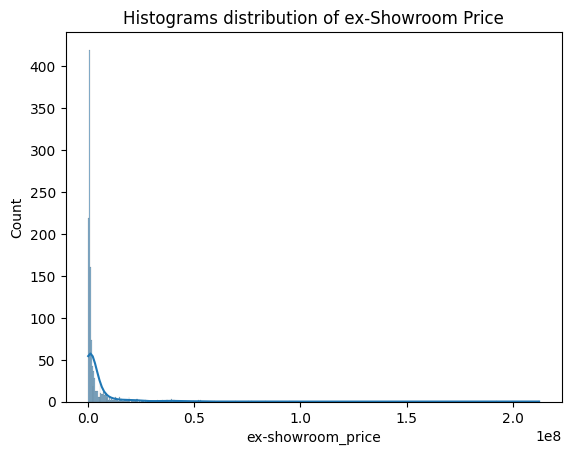

In [766]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data = df['ex-showroom_price'], kde=True).set(title='Histograms distribution of ex-Showroom Price')



[Text(0.5, 1.0, 'Histograms distribution of Displacement')]

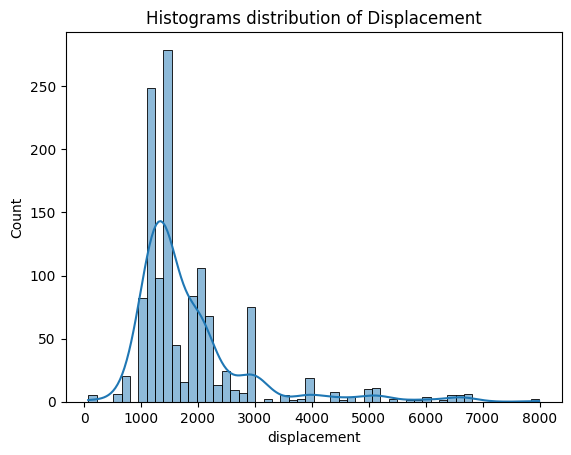

In [767]:
sns.histplot(data = df['displacement'], kde=True).set(title='Histograms distribution of Displacement')


# **6. Bar Charts:**
Plot bar charts to represent the count of categorical variables (e.g., car models, manufacturers).

In [768]:
import plotly.express as px

fig = px.bar(df['make'])
fig.show()

In [769]:
import plotly.express as px

fig = px.bar(df['model'])
fig.show()

In [770]:
fig = px.bar(df['drivetrain'].value_counts(),color_discrete_map={'drivetrain': 'blue'},x = 'drivetrain')
fig.show()

In [771]:


fig = px.bar(df['cylinder_configuration'].value_counts(), color=df['cylinder_configuration'].value_counts().index)


fig.update_layout(title='Distribution of Cylinder Configuration', xaxis_title='Cylinder Configuration', yaxis_title='Count')


fig.show()

# **7. Box Plots:**
Use box plots to identify outliers and understand the distribution of numeric variables.


<Axes: xlabel='ex-showroom_price'>

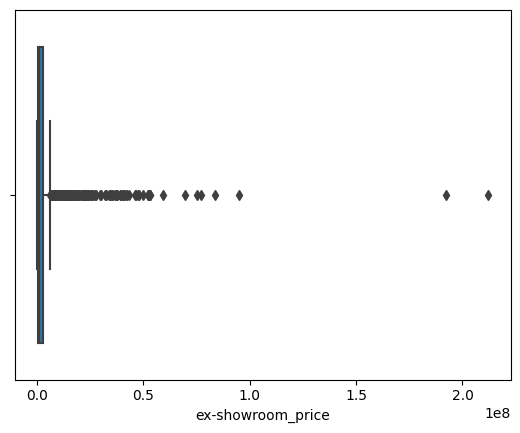

In [772]:
sns.boxplot(x=df["ex-showroom_price"])

<Axes: xlabel='displacement'>

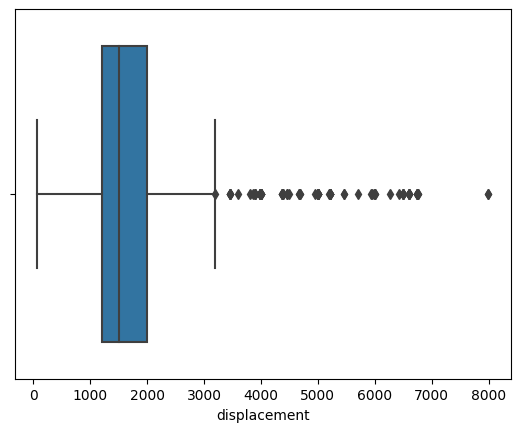

In [773]:
sns.boxplot(x=df["displacement"])

# **8. Pie Charts:**
Represent the contribution of different car models or manufacturers using pie charts.


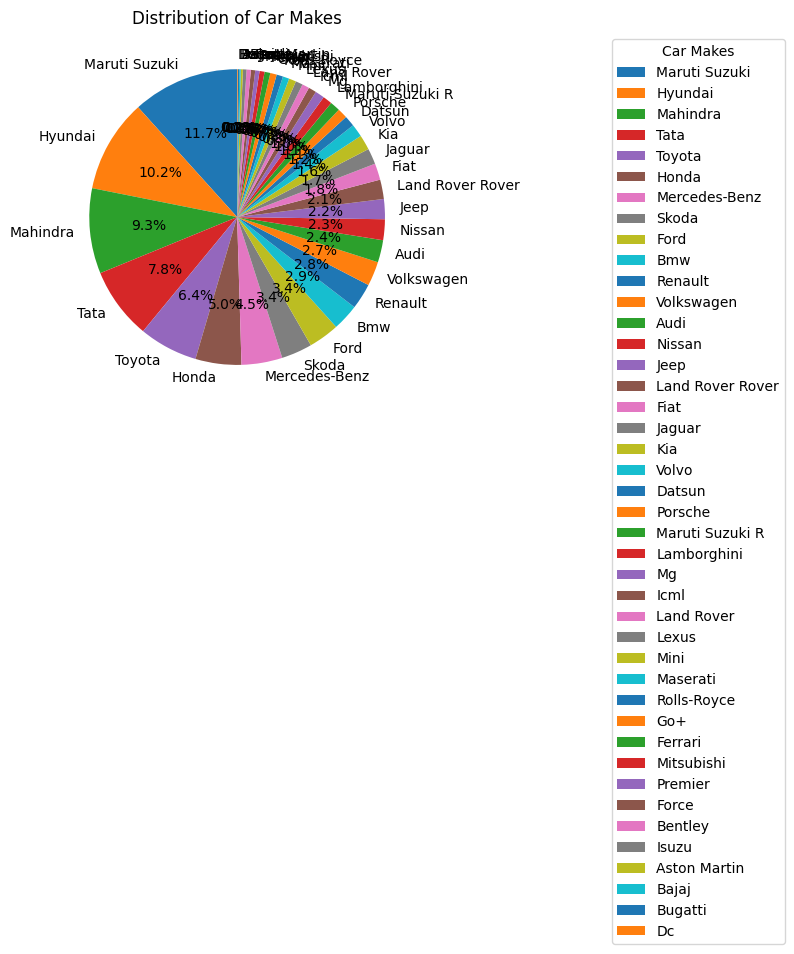

In [774]:
make_counts = df['make'].value_counts()


plt.pie(make_counts, labels=make_counts.index, autopct='%1.1f%%', startangle=90)


plt.legend(make_counts.index, title='Car Makes', loc='upper right', bbox_to_anchor=(2, 1))
plt.title('Distribution of Car Makes')
plt.show()

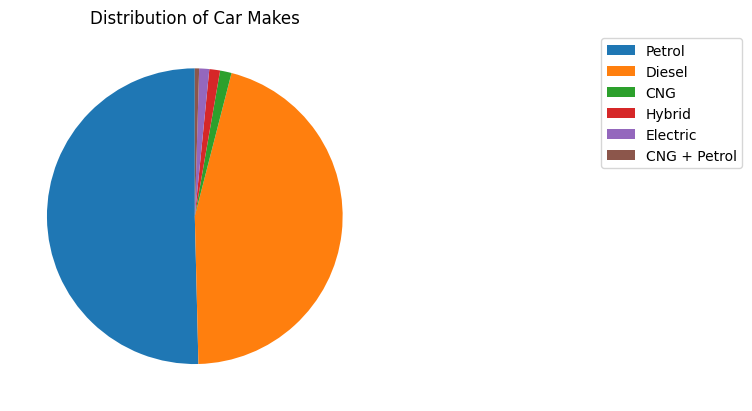

In [775]:
fuel_counts = df['fuel_type'].value_counts()



plt.pie(fuel_counts, labels=None, startangle=90, autopct='')

plt.legend(fuel_counts.index, loc='upper right', bbox_to_anchor=(2, 1))
plt.title('Distribution of Car Makes')
plt.show()

In [776]:
df['fuel_type'].value_counts()


Petrol          643
Diesel          582
CNG              16
Hybrid           15
Electric         14
CNG + Petrol      6
Name: fuel_type, dtype: int64

# **9. Count Plots:**
Visualize the count of observations for categorical variables using count plots.


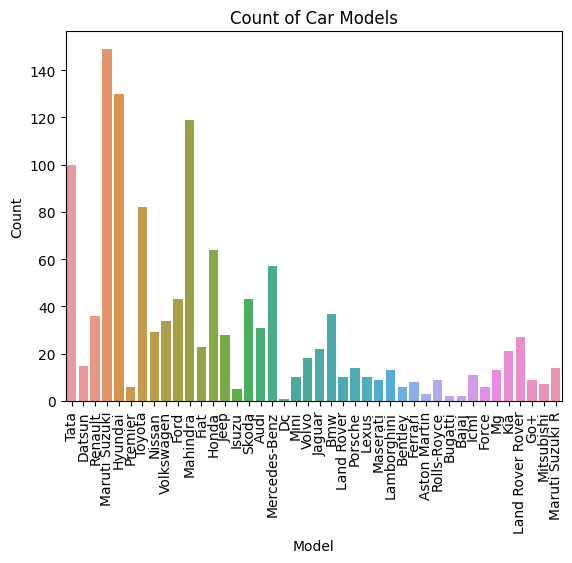

In [777]:
sns.countplot(x=df['make'])


plt.xlabel('Model')
plt.ylabel('Count')
plt.title('Count of Car Models')


plt.xticks(rotation=90)
plt.show()

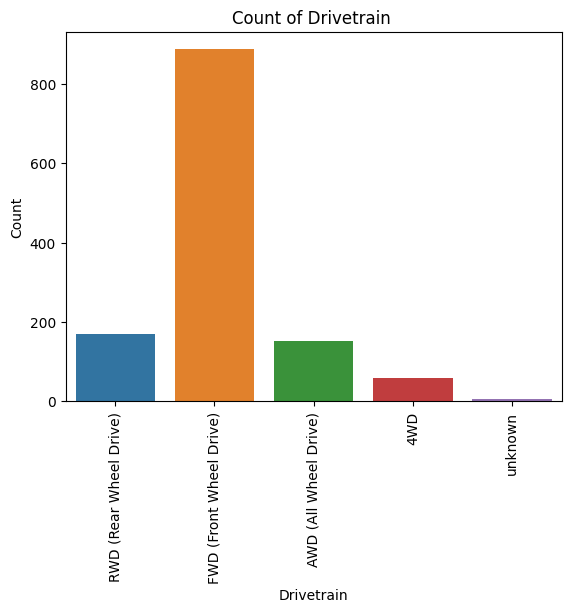

In [778]:
sns.countplot(x=df['drivetrain'])


plt.xlabel('Drivetrain')
plt.ylabel('Count')
plt.title('Count of Drivetrain ')


plt.xticks(rotation=90)
plt.show()

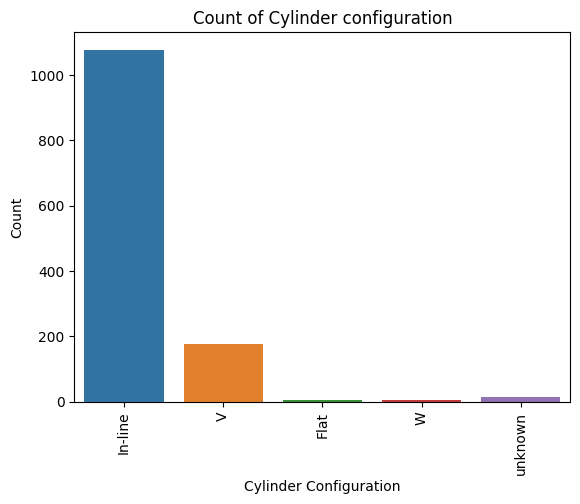

In [779]:

sns.countplot(x=df['cylinder_configuration'])


plt.xlabel('Cylinder Configuration')
plt.ylabel('Count')
plt.title('Count of Cylinder configuration')


plt.xticks(rotation=90)
plt.show()


## **Bi-Variate Analysis**

---



# **1. Correlation Matrix:**
Create a correlation matrix to understand the relationships between numeric variables.


<ipython-input-780-aba34ce34df5>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



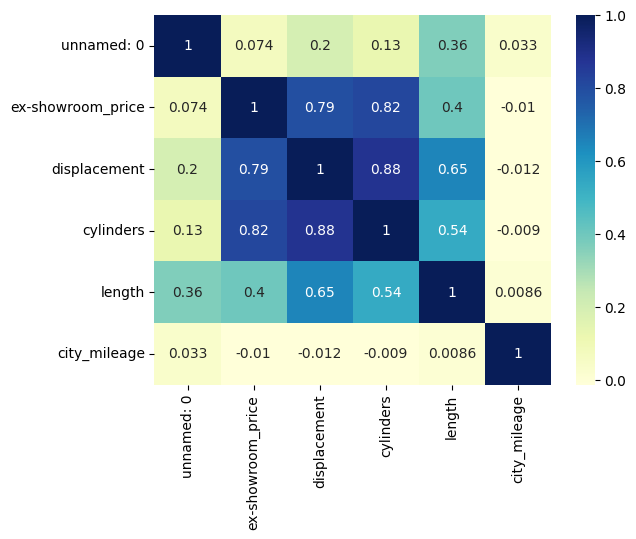

In [780]:

dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
plt.show()


# **2. Scatter Plots:**
Plot scatter plots to explore the relationship between two numeric variables (e.g., sales vs. price).


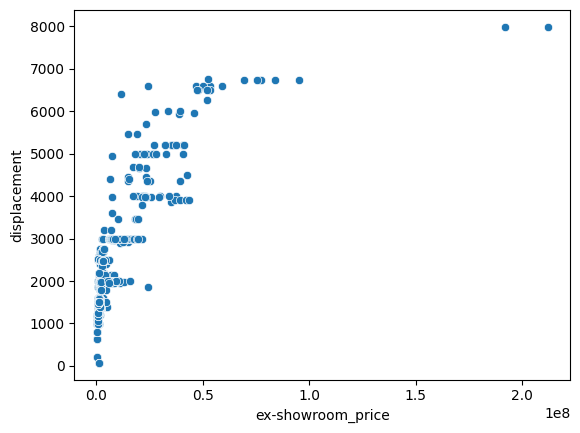

In [781]:
scatter1 = sns.scatterplot(x=df['ex-showroom_price'],y=df['displacement'],data=df)


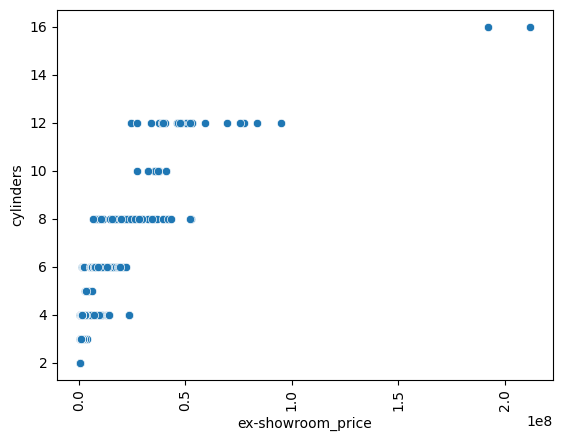

In [782]:
scatter2 = sns.scatterplot(x=df['ex-showroom_price'],y=df['cylinders'],data=df)
plt.xticks(rotation=90)
plt.show()

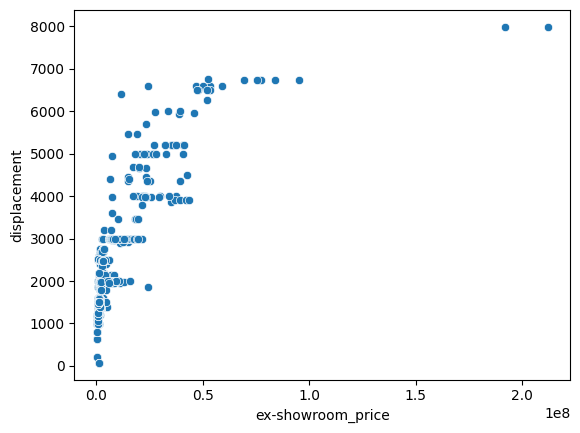

In [783]:
scatter3 = sns.scatterplot(x=df['ex-showroom_price'],y=df['displacement'],data=df)

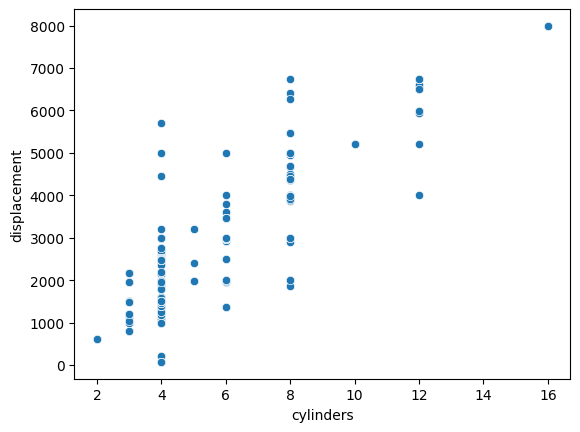

In [784]:
scatter4 = sns.scatterplot(x=df['cylinders'],y=df['displacement'],data=df)

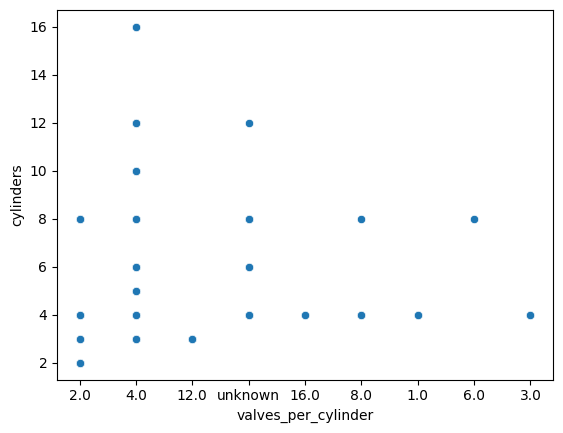

In [785]:
scatter5 = sns.scatterplot(x=df['valves_per_cylinder'],y=df['cylinders'],data=df)

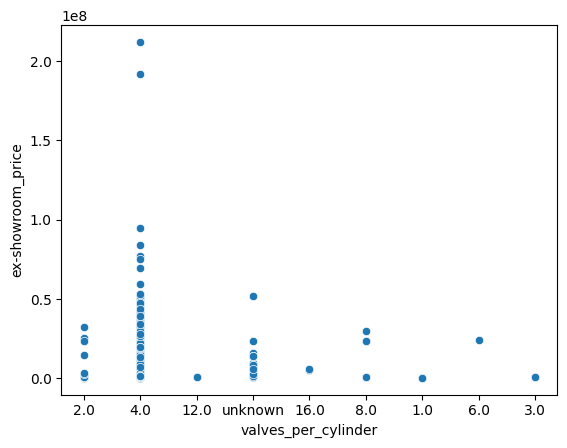

In [786]:
scatter6 = sns.scatterplot(x=df['valves_per_cylinder'],y=df['ex-showroom_price'],data=df)

# **Scatterplots in a single sheet**

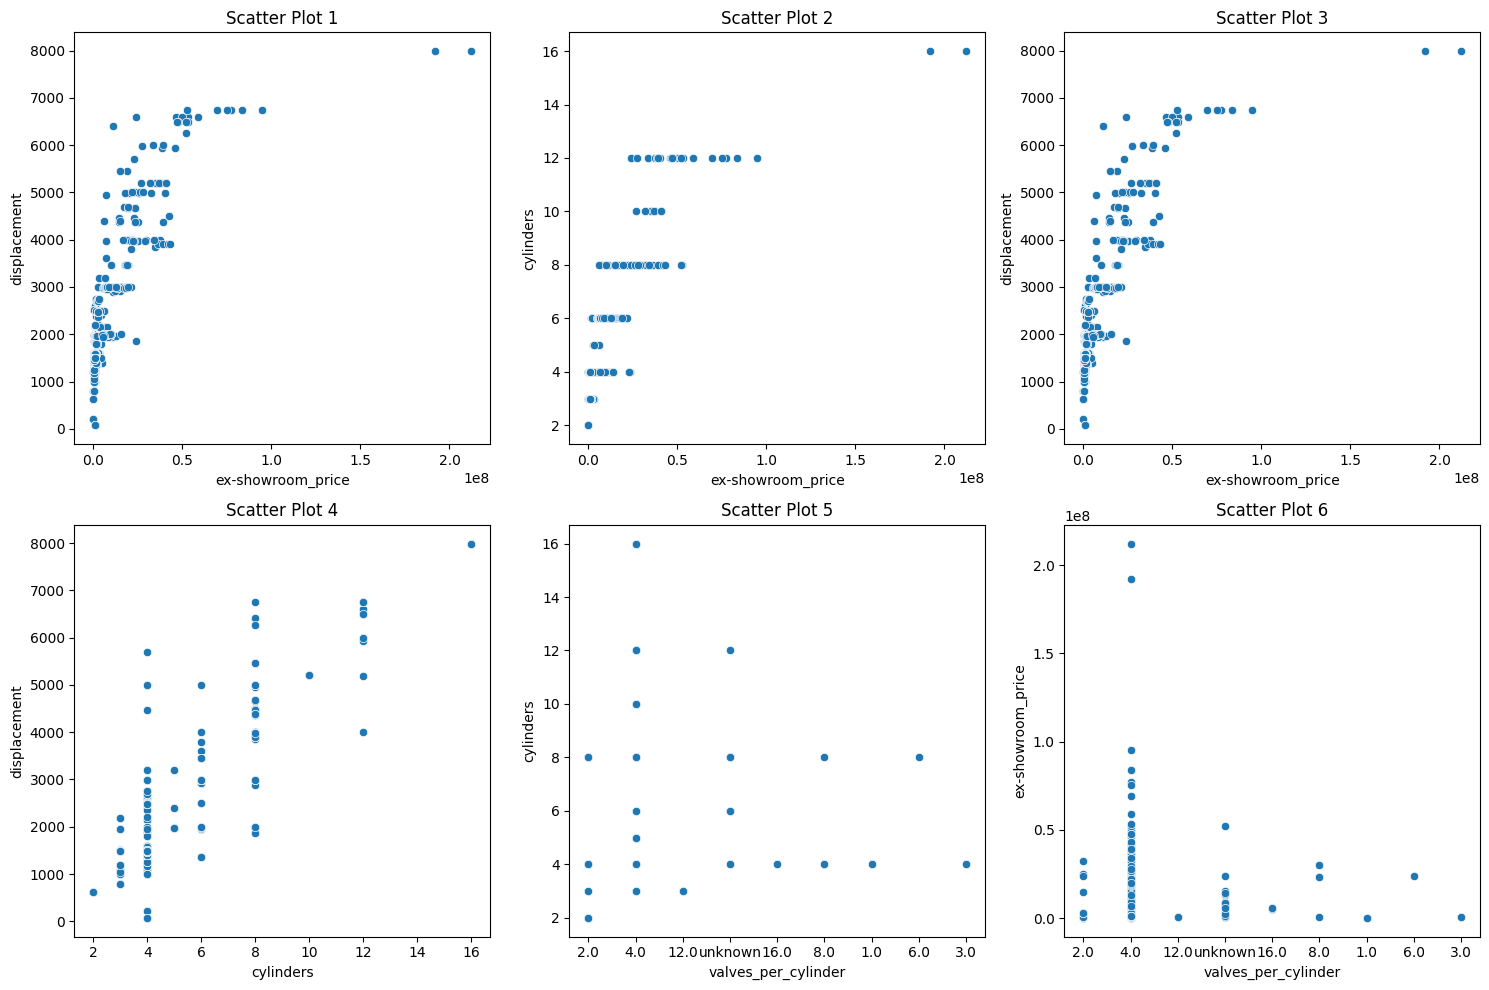

In [787]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))


scatter1 = sns.scatterplot(x='ex-showroom_price', y='displacement', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Scatter Plot 1')


scatter2 = sns.scatterplot(x='ex-showroom_price', y='cylinders', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Scatter Plot 2')


scatter3 = sns.scatterplot(x='ex-showroom_price', y='displacement', data=df, ax=axes[0, 2])
axes[0, 2].set_title('Scatter Plot 3')

scatter4 = sns.scatterplot(x='cylinders', y='displacement', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Scatter Plot 4')


scatter5 = sns.scatterplot(x='valves_per_cylinder', y='cylinders', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Scatter Plot 5')


scatter6 = sns.scatterplot(x='valves_per_cylinder', y='ex-showroom_price', data=df, ax=axes[1, 2])
axes[1, 2].set_title('Scatter Plot 6')


plt.tight_layout()
plt.show()

In [788]:
df.columns

Index(['unnamed: 0', 'make', 'model', 'variant', 'ex-showroom_price',
       'displacement', 'cylinders', 'valves_per_cylinder', 'drivetrain',
       'cylinder_configuration',
       ...
       'ipod_compatibility', 'esp_(electronic_stability_program)',
       'cooled_glove_box', 'turbocharger', 'isofix_(child-seat_mount)',
       'rain_sensing_wipers', 'leather_wrapped_steering',
       'automatic_headlamps', 'asr_/_traction_control', 'cruise_control'],
      dtype='object', length=116)

# **3. Pair Plots:**
Use pair plots for a quick overview of relationships between multiple numeric variables.


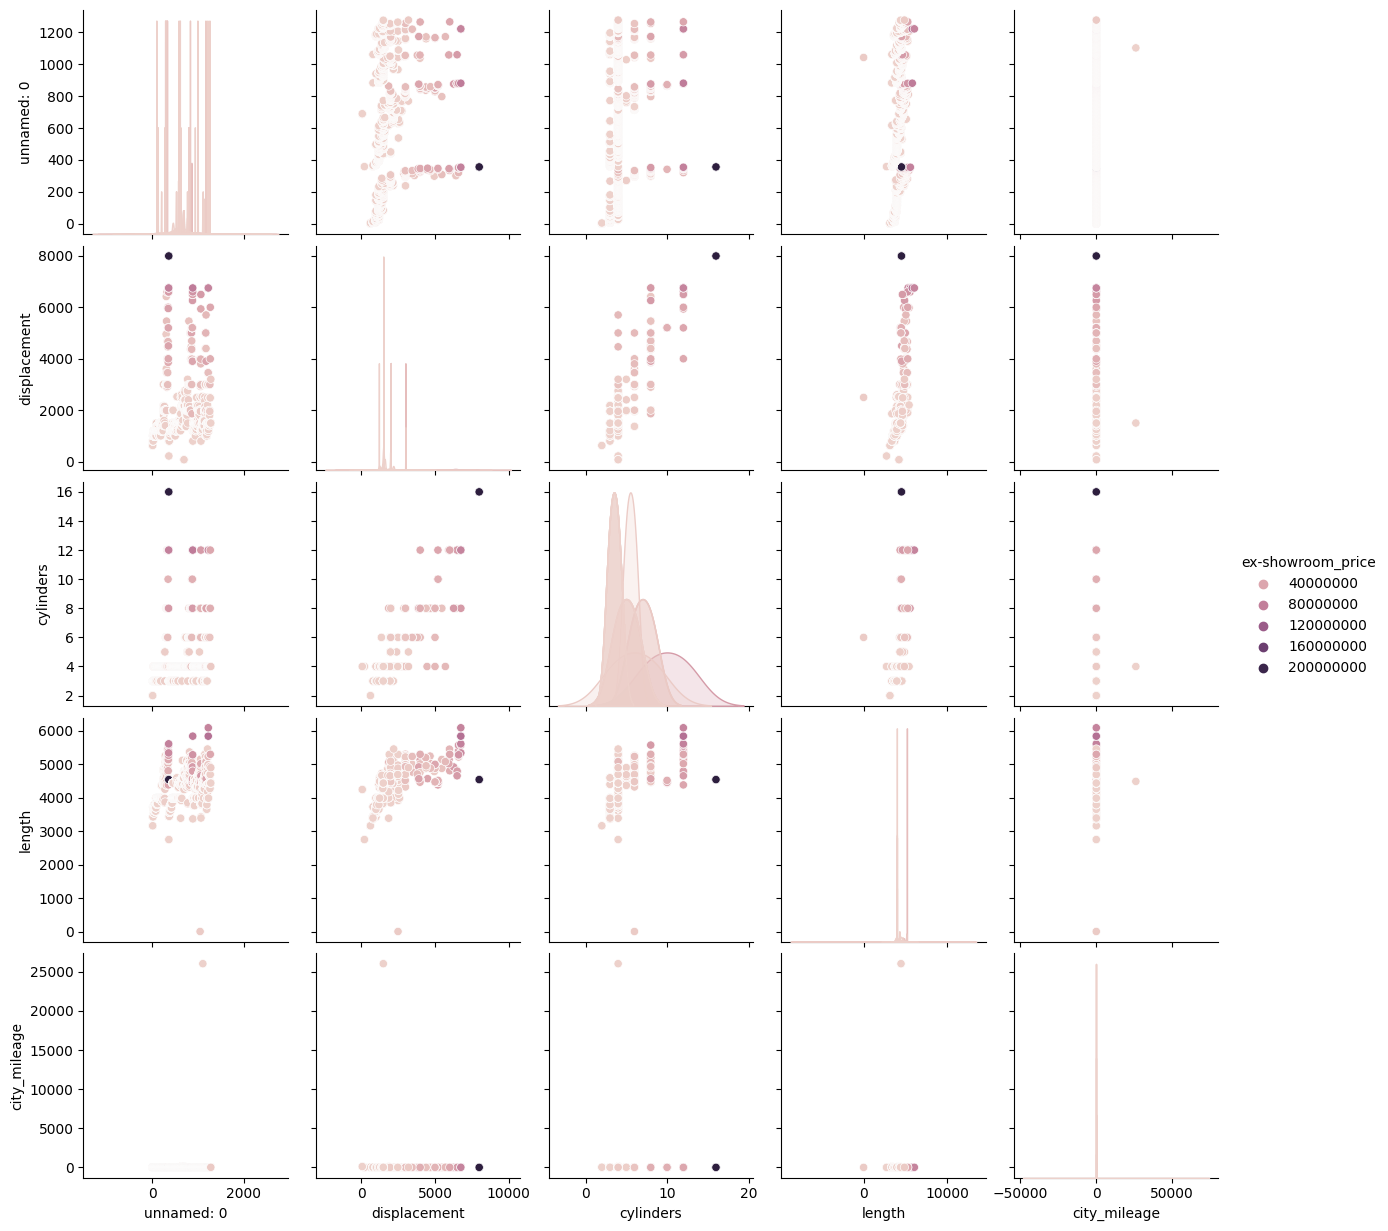

In [789]:
sns.pairplot(df, hue ='ex-showroom_price')
plt.show()

# **4. Bar Charts with Hue:**
Enhance bar charts by introducing the 'hue' parameter to represent additional categorical variables.


<Axes: xlabel='valves_per_cylinder', ylabel='cylinders'>

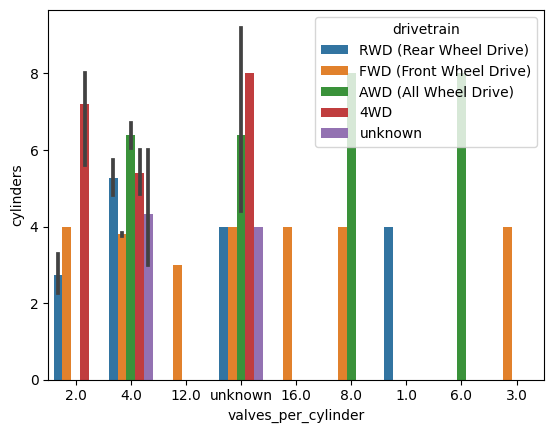

In [790]:
sns.barplot(df,x=df['valves_per_cylinder'],y=df['cylinders'],hue='drivetrain')

In [791]:
df.columns

Index(['unnamed: 0', 'make', 'model', 'variant', 'ex-showroom_price',
       'displacement', 'cylinders', 'valves_per_cylinder', 'drivetrain',
       'cylinder_configuration',
       ...
       'ipod_compatibility', 'esp_(electronic_stability_program)',
       'cooled_glove_box', 'turbocharger', 'isofix_(child-seat_mount)',
       'rain_sensing_wipers', 'leather_wrapped_steering',
       'automatic_headlamps', 'asr_/_traction_control', 'cruise_control'],
      dtype='object', length=116)

# **5. Heatmaps:**
Utilize heatmaps to visually represent the correlation matrix for better insights.


<ipython-input-837-8d97625607b7>:5: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



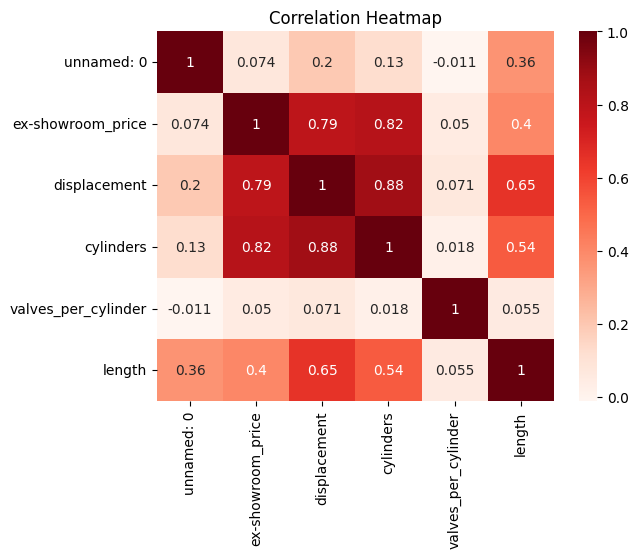

In [837]:
heatmp_data=df.copy()
heatmap_data.replace('unknown', 0, inplace=True)

sns.heatmap(heatmap_data.corr(), annot=True, cmap='Reds')

plt.title('Correlation Heatmap')
plt.show()

# **6. Joint Plots:**
Use joint plots to display the distribution of two numeric variables and their relationship.


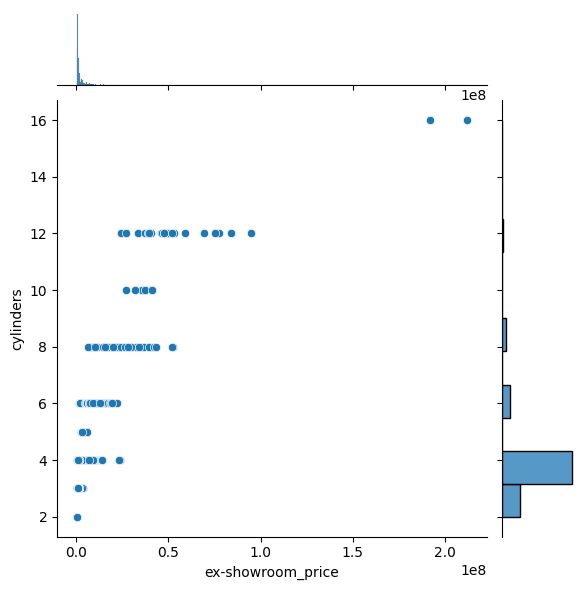

In [793]:
sns.jointplot(data=df,x='ex-showroom_price',y='cylinders')

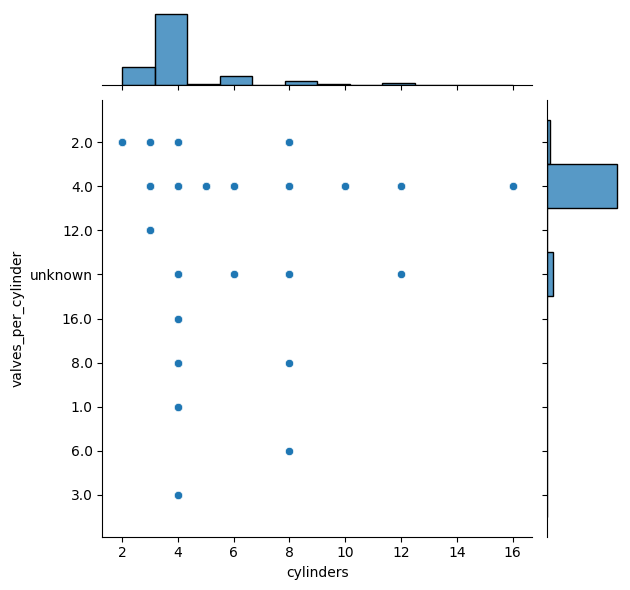

In [794]:
sns.jointplot(data=df,x='cylinders',y='valves_per_cylinder')

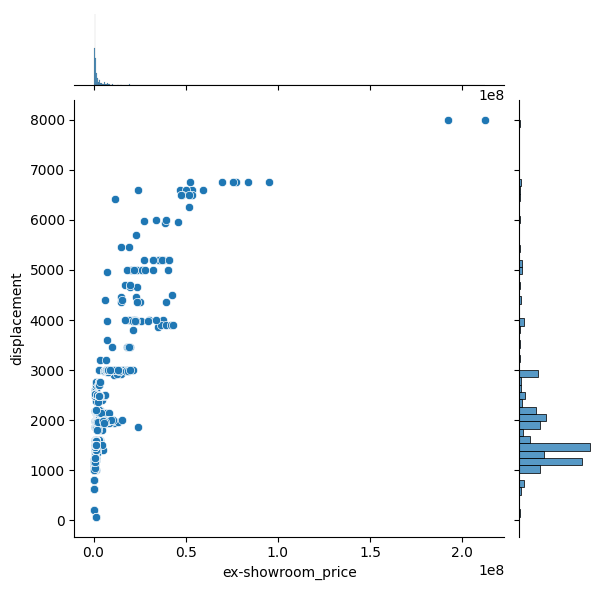

In [795]:
sns.jointplot(data=df,x='ex-showroom_price',y='displacement')

# **7. Box Plots with Hue:**
Enhance box plots by introducing the 'hue' parameter to represent additional categorical variables.

<Axes: xlabel='fuel_type', ylabel='cylinders'>

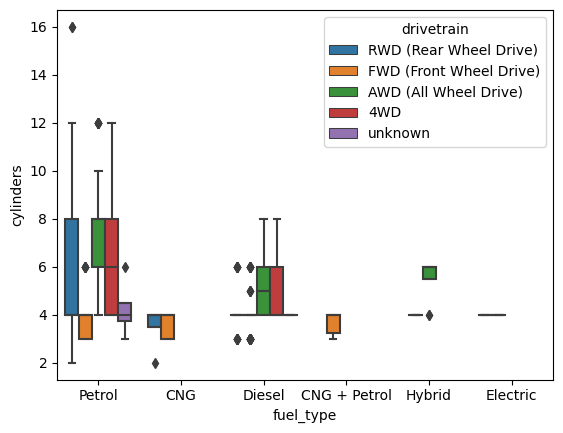

In [796]:
sns.boxplot(x='fuel_type', y='cylinders', data=df, hue='drivetrain')

<Axes: xlabel='valves_per_cylinder', ylabel='cylinders'>

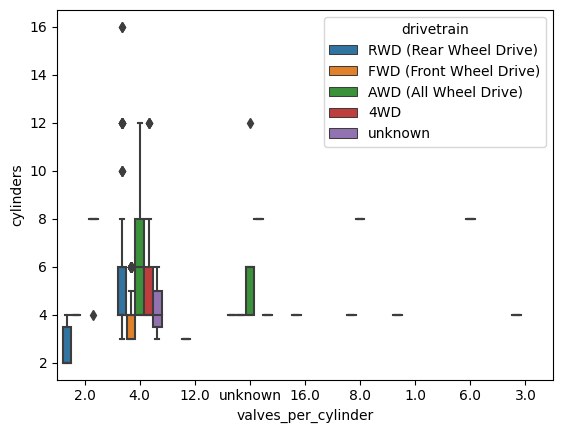

In [797]:
sns.boxplot(x='valves_per_cylinder', y='cylinders', data=df, hue='drivetrain')

<Axes: xlabel='cylinders', ylabel='gears'>

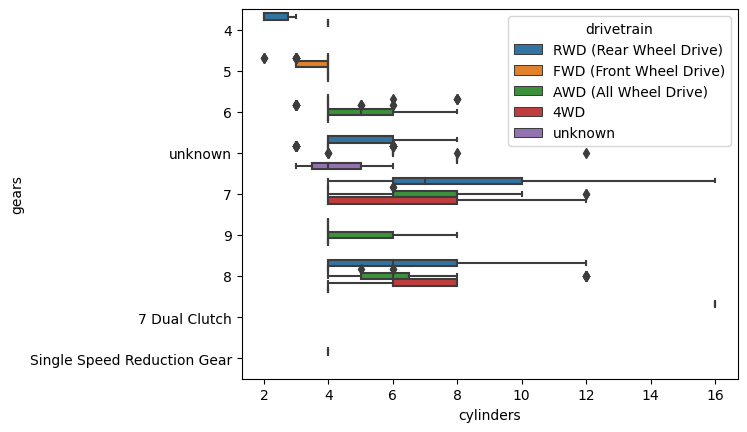

In [798]:
sns.boxplot(x='cylinders', y='gears', data=df, hue='drivetrain')

# **8. Categorical Plots:**
Explore relationships between categorical and numeric variables using categorical plots.


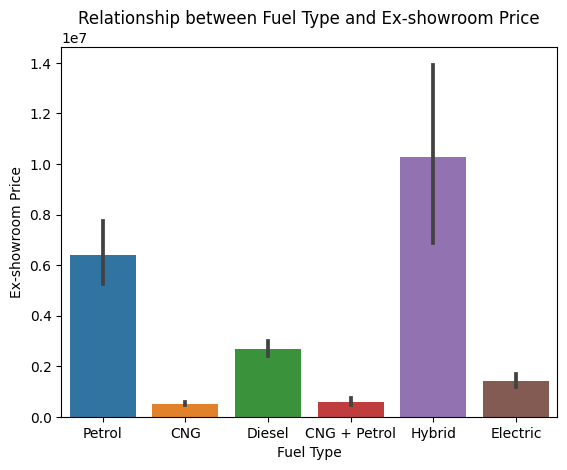

In [800]:
sns.barplot(x='fuel_type', y='ex-showroom_price', data=df)
plt.xlabel('Fuel Type')
plt.ylabel('Ex-showroom Price')
plt.title('Relationship between Fuel Type and Ex-showroom Price')
plt.show()

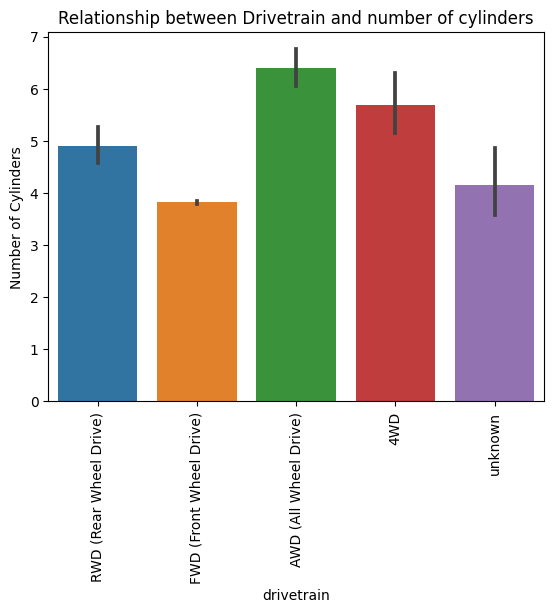

In [814]:

sns.barplot(x='drivetrain', y='cylinders', data=df)
plt.xticks(rotation=90)
plt.xlabel('drivetrain')
plt.ylabel('Number of Cylinders')
plt.title('Relationship between Drivetrain and number of cylinders')
plt.show()

# **9. Violin Plots:**
Visualize the distribution of numeric variables across different categories using violin plots.


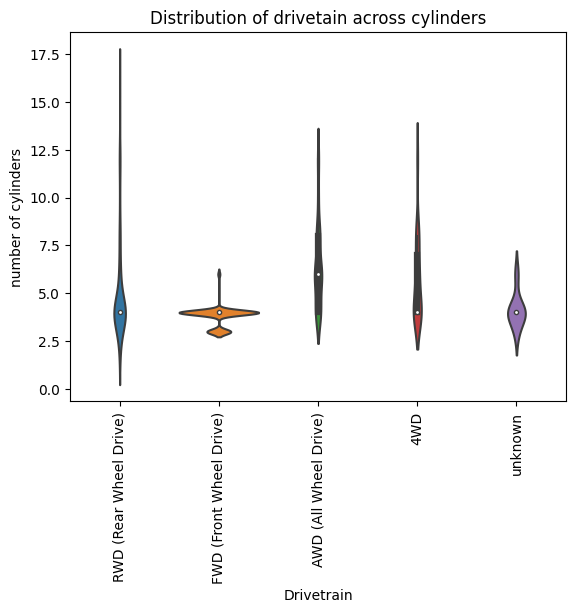

In [820]:
sns.violinplot(x='drivetrain', y='cylinders', data=df)
plt.xticks(rotation=90)

plt.xlabel('Drivetrain')
plt.ylabel('number of cylinders')
plt.title('Distribution of drivetain across cylinders')
plt.show()

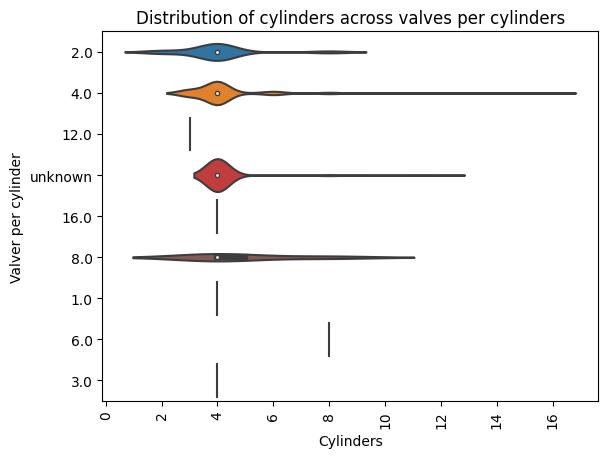

In [828]:
sns.violinplot(x='cylinders', y='valves_per_cylinder', data=df)
plt.xticks(rotation=90)

plt.xlabel('Cylinders')
plt.ylabel('Valver per cylinder')
plt.title('Distribution of cylinders across valves per cylinders')
plt.show()

# **10. Stacked Bar Charts:**
Represent the combined contribution of different categories using stacked bar charts.


<ipython-input-829-afa54652550e>:1: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




Text(0.5, 1.0, 'Stacked Bar Chart of Different Categories')

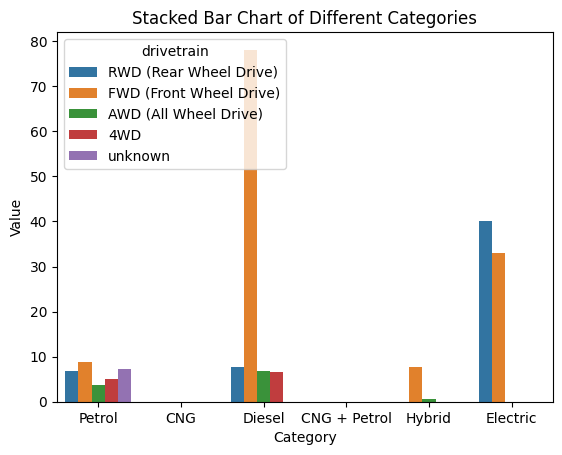

In [829]:
sns.barplot(x='fuel_type', y='city_mileage', hue='drivetrain', data=df, ci=None)

plt.xlabel('Fuel Type')
plt.ylabel('Mileage')
plt.title('Stacked Bar Chart with drivetrain as hue')

<ipython-input-833-a1d60277b810>:1: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




Text(0.5, 1.0, 'Stacked Bar Chart with drivetrain as hue')

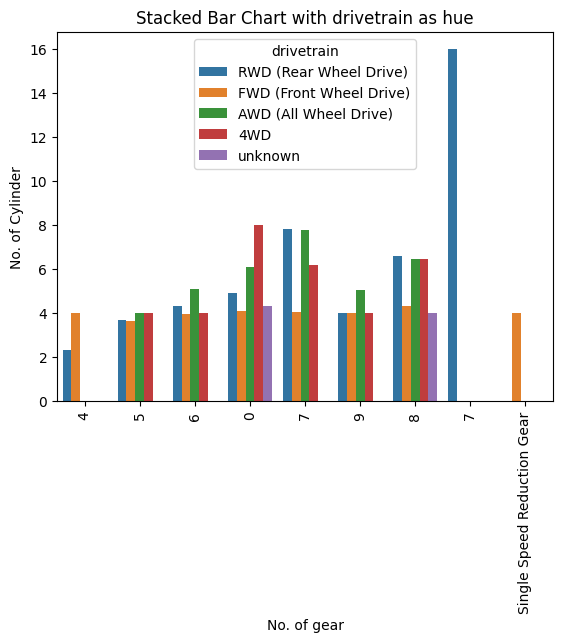

In [833]:
sns.barplot(x='gears', y='cylinders', hue='drivetrain', data=df, ci=None)
plt.xticks(rotation=90)
plt.xlabel('No. of gear')
plt.ylabel('No. of Cylinder')
plt.title('Stacked Bar Chart with drivetrain as hue')